
### 1. **舌苔**
舌苔是舌面上覆蓋的薄層物質，通常是白色、薄厚不等，通過觀察舌苔的顏色、厚度和乾濕，可以反映人體的內部狀況。

- **白苔**：多見於寒濕或外感風寒，正常情況下也會出現，特別是早晨起床時。
- **黃苔**：代表體內有濕熱或熱邪，通常伴隨著口乾、便秘等症狀。
- **黑苔**：通常是體內熱毒嚴重，或者燥熱導致的，可能見於重病或中毒狀況。
- **薄苔**：反映身體的氣血較為虛弱，常見於體質虛弱或病後恢復期。
- **厚苔**：表明體內有濕氣重、痰濁或食積。
- **乾苔**：通常反映體內陰液不足，可能伴隨著口渴、便秘等症狀。

### 2. **舌質**
舌質是舌的根本狀況，它反映了身體的陰陽、氣血以及臟腑的健康狀況。

- **紅舌**：常見於體內有熱邪，尤其是心火旺盛，或內熱積聚，如發熱、煩躁、口渴等症狀。
- **淡舌**：代表氣血虛弱，陰虛或氣虛，常見於長期體虛或疾病恢復期。
- **紫舌**：通常見於氣血阻滯或血瘀狀況，反映血液循環不良。
- **舌質胖大**：提示有濕氣或痰濁，或脾胃虛弱，食物停滯。

### 3. **舌尖**
舌尖的變化與心臟、肺臟、胃腸有關，舌尖的顏色與形狀可以反映這些臟腑的健康狀況。

- **舌尖紅**：代表心火過旺或肺熱，可能會伴隨心悸、口乾、失眠等症狀。
- **舌尖裂**：通常與陰虛或體內的熱邪有關，特別是心火亢盛。

### 4. **舌裂**
舌裂常與陰虛或熱邪過重有關。當舌面出現深裂紋時，可能與體內的津液不足、脫水或陰虛有關。

- **舌裂紋**：常見於陰虛體質或嚴重的內熱，尤其在長期病後或者過度勞累後。

### 5. **齒痕**
齒痕是指舌邊緣出現明顯的齒痕印跡，常見於脾胃虛弱、濕氣重或氣虛。

- **齒痕明顯**：提示脾胃功能虛弱，常伴有食慾不振、腹脹、消化不良等症狀。

### 6. **舌長度**
舌伸出的長度也能反映身體的狀況。

- **舌頭過長或伸出過多**：可能與熱邪、心火旺盛或焦慮等有關。
- **舌頭過短**：通常與體內氣虛、血虛或元氣不足有關。

### 7. **左右對稱**
舌的對稱性也可以反映出內臟的健康狀況，特別是脾胃和肝臟的健康。

- **不對稱或歪斜**：可能反映出某一側的臟腑功能失常，通常與肝氣鬱結或脾胃不和有關，嚴重時可能與中風或神經系統問題有關。

### 8. **舌邊與人中門齒連線**
這條線反映的是舌的左右對稱性。若舌的兩邊不對稱，可能與脾胃、肝氣鬱結或其他臟腑的問題有關。

---



---

### **1. 安裝 YOLOv8 的依賴庫**
確保你的環境中安裝了 YOLOv8 的相關工具。可以使用以下命令安裝：
```bash
pip install ultralytics
```

這會安裝 `ultralytics`，其中包含 YOLOv8 的相關功能。

---

In [ ]:
# pip install ultralytics

In [ ]:
# 處理Tongue_coating_classification 成yolo格式

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO
# 其他訓練程式碼

# 訓練 YOLOv8-Seg 模型
!yolo task=segment mode=train model=yolo11s-seg.pt data=yolo_data/data.yaml epochs=50 imgsz=960 batch=16 device=0


# 推理結果

In [16]:
from ultralytics import YOLO

# 載入已訓練好的模型
model = YOLO(r"runs\segment\train\weights\best.pt").to("cuda")

# 輸入圖片路徑
image_path = r"test\S__102228039.jpg"

# 使用模型進行推理
results = model(image_path, device="cuda")

# 由於 `results` 是一個列表，所以我們取第一個元素
result = results[0]

# 顯示推理結果
result.show()  # 這會顯示圖片並標註預測結果

# 你也可以保存預測的圖片到指定位置
result.save()  # 預測結果會保存在 runs/segment/predict 路徑下


image 1/1 c:\Users\B20770\Desktop\yolo_tongue_coating\yolo_tongue_coating\test\S__102228039.jpg: 1088x832 1 Tongue, 60.5ms
Speed: 6.0ms preprocess, 60.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 832)


'results_S__102228039.jpg'

# 生成MAS


image 1/1 c:\Users\B20770\Desktop\yolo_tongue_coating\yolo_tongue_coating\test\S__102228039.jpg: 1088x832 1 Tongue, 9.3ms
Speed: 4.3ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 832)


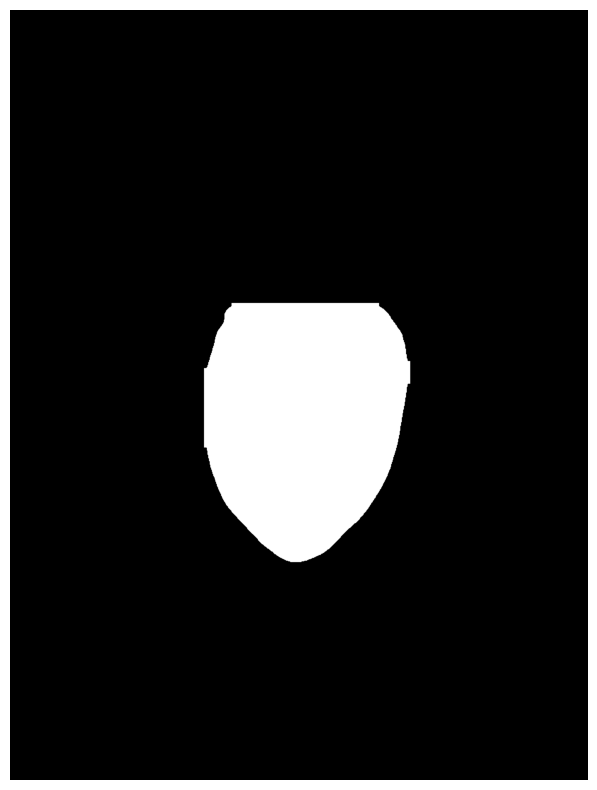

遮罩已保存為 output_mask_matplotlib.png


In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1. 載入已訓練好的模型
model = YOLO(r"runs\segment\train\weights\best.pt").to("cuda")

# 2. 指定測試圖片路徑
image_path = r"test\S__102228039.jpg"

# 3. 讀取原始圖片，以便取得原圖大小 (H, W)
original_image = cv2.imread(image_path)
if original_image is None:
    raise FileNotFoundError(f"無法讀取圖片，請確認路徑是否正確: {image_path}")
h, w = original_image.shape[:2]

# 4. 進行推理，取得結果 (假設只有單張圖片)
results = model.predict(source=image_path, device="cuda")
result = results[0]

# 5. 檢查是否有分割結果
if result.masks is None or len(result.masks.xy) == 0:
    raise ValueError("未檢測到任何分割物件，請確認模型或圖片內容。")

# 6. 建立一張全黑影像 (單通道) 作為 mask，其大小與原圖相同
mask = np.zeros((h, w), dtype=np.uint8)

# 7. 取出所有物件的多邊形座標，並在 mask 上 fillPoly
for polygon_pts in result.masks.xy:
    polygon_pts = np.array(polygon_pts, dtype=np.int32)  # 確保座標轉為整數
    cv2.fillPoly(mask, [polygon_pts], 255)  # 填充多邊形

# 8. 用 matplotlib 繪製並保存
plt.figure(figsize=(10, 10))  # 設置繪圖尺寸
plt.imshow(mask, cmap='gray')  # 使用灰度圖顯示遮罩
plt.axis('off')  # 移除座標軸
output_path = "output_mask_matplotlib.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # 保存圖片
plt.show()  # 顯示圖片
print(f"遮罩已保存為 {output_path}")


# 查看輪廓


image 1/1 c:\Users\B20770\Desktop\yolo_tongue_coating\yolo_tongue_coating\test\S__102236164.jpg: 1088x832 1 Tongue, 45.8ms
Speed: 4.1ms preprocess, 45.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1088, 832)


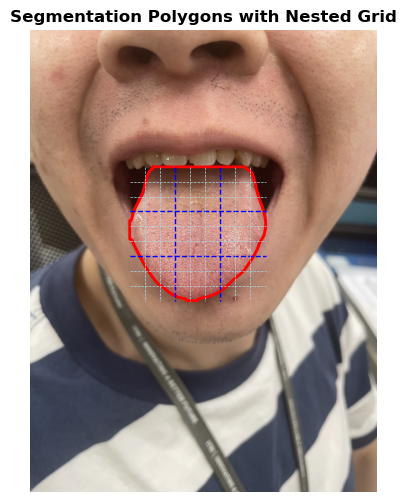

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. 載入模型並推理
model = YOLO(r"runs\segment\train\weights\best.pt").to("cuda")
image_path = r"test\S__102236164.jpg"
results = model.predict(source=image_path, device="cuda")
result = results[0]

# 2. 讀取原圖 (OpenCV 為 BGR) 並轉成 RGB，方便用 matplotlib 顯示
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. 顯示原圖
plt.figure(figsize=(8, 6))
plt.imshow(img)

# 4. 取得所有多邊形座標，對每個多邊形繪製輪廓並添加九宮格和細分九宮格
polygons = result.masks.xy  # 這是一個 list，每個元素是形狀為 (M, 2) 的多邊形座標
for poly in polygons:
    # 確保多邊形是封閉的，將起點重新添加到最後
    poly = np.vstack([poly, poly[0]])

    x = poly[:, 0]  # 取 x 座標
    y = poly[:, 1]  # 取 y 座標

    # (A) 畫多邊形邊界
    plt.plot(x, y, color='red', linewidth=2)

    # (B) 計算九宮格
    min_x, max_x = x.min(), x.max()
    min_y, max_y = y.min(), y.max()

    # 計算水平線和垂直線的位置
    x_step = (max_x - min_x) / 3
    y_step = (max_y - min_y) / 3

    # 繪製主要九宮格的垂直線
    for i in range(1, 3):
        plt.plot([min_x + i * x_step, min_x + i * x_step], [min_y, max_y], color='blue', linestyle='--', linewidth=1)

    # 繪製主要九宮格的水平線
    for i in range(1, 3):
        plt.plot([min_x, max_x], [min_y + i * y_step, min_y + i * y_step], color='blue', linestyle='--', linewidth=1)

    # (C) 在每個主要九宮格內細分為更小的九宮格
    for i in range(3):
        for j in range(3):
            # 每個子九宮格的邊界
            sub_min_x = min_x + i * x_step
            sub_max_x = sub_min_x + x_step
            sub_min_y = min_y + j * y_step
            sub_max_y = sub_min_y + y_step

            # 計算子九宮格的分割線
            sub_x_step = (sub_max_x - sub_min_x) / 3
            sub_y_step = (sub_max_y - sub_min_y) / 3

            # 繪製子九宮格的垂直線
            for k in range(1, 3):
                plt.plot(
                    [sub_min_x + k * sub_x_step, sub_min_x + k * sub_x_step],
                    [sub_min_y, sub_max_y],
                    color='lightblue',
                    linestyle='--',
                    linewidth=0.5
                )

            # 繪製子九宮格的水平線
            for k in range(1, 3):
                plt.plot(
                    [sub_min_x, sub_max_x],
                    [sub_min_y + k * sub_y_step, sub_min_y + k * sub_y_step],
                    color='lightblue',
                    linestyle='--',
                    linewidth=0.5
                )

# 5. 若發現 y 軸反了，可視需要 invert y 軸
# plt.gca().invert_yaxis()

plt.title("Segmentation Polygons with Nested Grid")
plt.axis('off')
plt.show()


# 新的資料集測試模型精準度

In [24]:
from ultralytics import YOLO
import os
import cv2
import numpy as np
from tqdm import tqdm  # 用於顯示進度條
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# 初始化模型
model = YOLO(r"runs/segment/train/weights/best.pt", verbose=False).to("cuda")  # 將模型加載到 CUDA（GPU）上

# 設定圖片與標準文件夾路徑
img_dir = r"data/TongeImageDataset/img"  # 原圖文件夾
mask_dir = r"data/TongeImageDataset/mask"  # 標準掩碼文件夾

# 指標計算函數
def calculate_iou(pred, mask):
    """計算 IoU 分數"""
    if np.sum(pred) == 0 and np.sum(mask) == 0:  # 如果分割結果和標準掩碼都為空
        return 1.0
    intersection = np.logical_and(pred, mask)  # 交集
    union = np.logical_or(pred, mask)  # 聯集
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0  # 計算 IoU
    return iou

def calculate_dice(pred, mask):
    """計算 Dice 系數"""
    intersection = np.sum(pred * mask)
    dice = (2 * intersection) / (np.sum(pred) + np.sum(mask)) if (np.sum(pred) + np.sum(mask)) > 0 else 1.0
    return dice

# 處理所有圖片
iou_scores = []
dice_scores = []
all_pred_labels = []
all_true_labels = []

for img_name in tqdm(os.listdir(img_dir), desc="處理圖片中"):
    # 跳過非 PNG 文件
    if not img_name.endswith(".png"):
        continue

    # 獲取圖片與標準掩碼的路徑
    img_path = os.path.join(img_dir, img_name)
    mask_path = os.path.join(mask_dir, img_name)

    # 確保有對應的標準掩碼
    if not os.path.exists(mask_path):
        continue

    # 推理圖片
    results = model(img_path, device="cuda", verbose=False)  # 使用模型進行推理
    result = results[0]

    # 檢查分割掩碼是否存在
    if result.masks is None or len(result.masks.data) == 0:
        continue

    # 獲取分割掩碼（只取第一個類別）
    pred_mask = result.masks.data[0].cpu().numpy()  # 提取分割掩碼
    pred_mask = (pred_mask > 0.9).astype(np.uint8)  # 將分割結果轉為二值化

    # 讀取標準掩碼
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        continue
    mask = (mask > 127).astype(np.uint8)  # 二值化標準掩碼

    # 將分割掩碼的尺寸調整為與標準掩碼一致
    pred_mask_resized = cv2.resize(pred_mask, (mask.shape[1], mask.shape[0]), interpolation=cv2.INTER_NEAREST)

    # 計算指標
    iou = calculate_iou(pred_mask_resized, mask)
    dice = calculate_dice(pred_mask_resized, mask)

    # 保存指標
    iou_scores.append(iou)
    dice_scores.append(dice)

    # 展平並收集所有像素的標籤
    all_pred_labels.extend(pred_mask_resized.flatten())
    all_true_labels.extend(mask.flatten())

# 整體評估
mean_iou = np.mean(iou_scores) if iou_scores else 0  # 計算平均 IoU
mean_dice = np.mean(dice_scores) if dice_scores else 0  # 計算平均 Dice

# 使用 classification_report 生成報告
report = classification_report(all_true_labels, all_pred_labels, target_names=["Background", "Foreground"], zero_division=0)

# 打印總體結果
print(f"所有圖片的平均 IoU: {mean_iou:.4f}")
print(f"所有圖片的平均 Dice: {mean_dice:.4f}")
print("分類報告:\n")
print(report)


處理圖片中: 100%|██████████| 300/300 [00:16<00:00, 17.86it/s]


所有圖片的平均 IoU: 0.9547
所有圖片的平均 Dice: 0.9766
分類報告:

              precision    recall  f1-score   support

  Background       0.99      0.99      0.99 103634498
  Foreground       0.98      0.98      0.98  29075902

    accuracy                           0.99 132710400
   macro avg       0.99      0.99      0.99 132710400
weighted avg       0.99      0.99      0.99 132710400



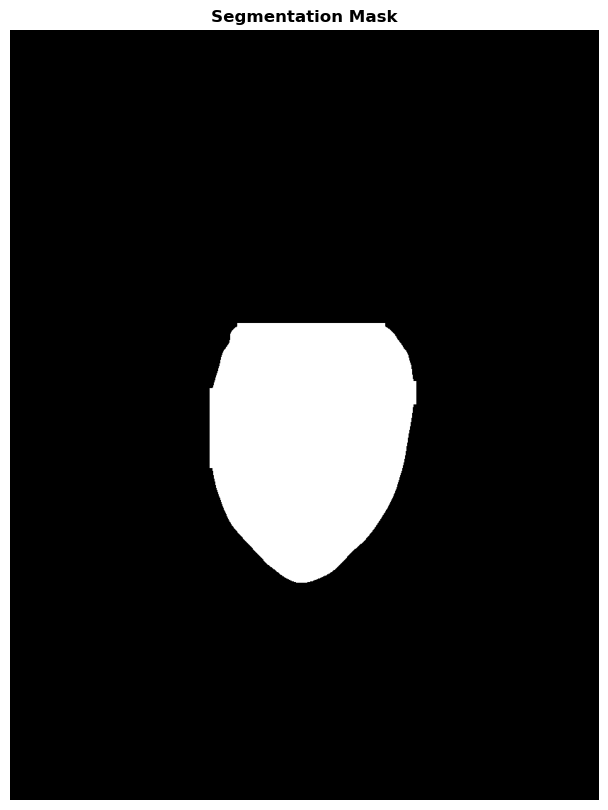

In [23]:
# 5. 取出第一個分割掩碼
mask_tensor = result.masks.data[0]  # 掩碼的張量格式
mask = mask_tensor.cpu().numpy()  # 將張量轉為 NumPy 陣列
mask_binary = (mask > 0.9).astype(np.uint8)  # 二值化掩碼

# 6. 可視化結果
plt.figure(figsize=(10, 10))
plt.imshow(mask_binary, cmap="gray")
plt.title("Segmentation Mask")
plt.axis("off")
plt.show()